## Exploratory Analysis and Visualisation of the Supermarket Dataset

We first must undertake an exploratory analysis of the data which has been given to us, as well as tidying it.
Identifying some questions which we should be able to answer:

1. Undertake some initial visualisations of the data
2. What are the general trends over each chain of supermarket?
3. What is the average over the working week, saturday, and sunday for each supermarket?
4. Can we identify any trends based on location of the supermarkets?

In [2]:
# imports
from __future__ import division
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fm # leaflet extension
sns.set_style("whitegrid")
%matplotlib inline

In [3]:
# getting data
demand = pd.read_csv('./Data/demandData.csv')
demand.describe()

,1/07/19,2/07/19,3/07/19,4/07/19,5/07/19,6/07/19,7/07/19,8/07/19,9/07/19,10/07/19,...,19/07/19,20/07/19,21/07/19,22/07/19,23/07/19,24/07/19,25/07/19,26/07/19,27/07/19,28/07/19
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0,46.000000,46.000000,46.000000,...,46.000000,46.000000,46.0,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0
mean,5.108696,5.108696,5.260870,5.413043,5.108696,2.173913,0.0,5.521739,5.413043,5.260870,...,5.347826,2.391304,0.0,5.326087,4.891304,5.521739,5.347826,5.521739,2.456522,0.0
std,2.734376,2.668568,2.453431,2.737201,2.405810,1.677357,0.0,2.536306,3.037368,2.594308,...,2.469524,1.867598,0.0,2.875601,2.172845,2.596914,2.643377,2.664492,1.963065,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0
25%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,0.0,3.250000,3.000000,3.000000,...,3.000000,1.000000,0.0,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,0.0
50%,5.000000,5.000000,6.000000,6.000000,5.500000,2.000000,0.0,6.000000,6.000000,6.000000,...,6.000000,2.000000,0.0,5.000000,5.000000,6.000000,5.500000,6.000000,2.000000,0.0
75%,7.000000,7.000000,7.000000,7.000000,6.000000,3.000000,0.0,7.000000,8.000000,7.000000,...,7.750000,3.000000,0.0,7.000000,6.000000,8.000000,7.000000,7.750000,3.000000,0.0
max,10.000000,11.000000,10.000000,10.000000,10.000000,6.000000,0.0,11.000000,12.000000,10.000000,...,10.000000,6.000000,0.0,11.000000,10.000000,10.000000,12.000000,11.000000,6.000000,0.0


Clearly for every Sunday the mean is zero, and we can probably drop every Sunday from the dataset (not useful).

In [4]:
# checking attribs
demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 29 columns):
Supermarket    46 non-null object
1/07/19        46 non-null int64
2/07/19        46 non-null int64
3/07/19        46 non-null int64
4/07/19        46 non-null int64
5/07/19        46 non-null int64
6/07/19        46 non-null int64
7/07/19        46 non-null int64
8/07/19        46 non-null int64
9/07/19        46 non-null int64
10/07/19       46 non-null int64
11/07/19       46 non-null int64
12/07/19       46 non-null int64
13/07/19       46 non-null int64
14/07/19       46 non-null int64
15/07/19       46 non-null int64
16/07/19       46 non-null int64
17/07/19       46 non-null int64
18/07/19       46 non-null int64
19/07/19       46 non-null int64
20/07/19       46 non-null int64
21/07/19       46 non-null int64
22/07/19       46 non-null int64
23/07/19       46 non-null int64
24/07/19       46 non-null int64
25/07/19       46 non-null int64
26/07/19       46 non-null int64
27/07

We already have a nice reshaped and averaged dataset (courtesy of James). The code to do this is in the next cell, and we will do some analysis of this reformatted dataset.

In [8]:
# Import data
demandData = pd.read_csv("./Data/demandData.csv")
locationData = pd.read_csv("./Data/FoodstuffLocations.csv")
    
# Add supermarket types to demand data frame
demandData = pd.merge(demandData, locationData[["Type", "Supermarket"]], on="Supermarket")

# Change Fresh Collective type to Four Square
demandData.loc[demandData["Supermarket"] == "Fresh Collective Alberton", "Type"] = "Four Square"

# Reshape data to make date a factor
demandData = pd.melt(demandData, ["Supermarket", "Type"], [column for column in demandData.columns if "/07/19" in column], "Date", "Demand")
demandData["Date"] = pd.to_datetime(demandData["Date"], dayfirst=True)

# Delete Sundays from data
demandData = demandData[demandData["Date"].dt.dayofweek <= 5]

# Convert dates to weekdays
demandData["Weekday"] = demandData["Date"].dt.day_name()
demandData = demandData.drop("Date", 1)

In [9]:
# Now displaying what the new dataset looks like
demandData.describe()

,Demand
count,1104.000000
mean,4.756341
std,2.684271
min,0.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,12.000000


In [10]:
demandData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1104 entries, 0 to 1241
Data columns (total 4 columns):
Supermarket    1104 non-null object
Type           1104 non-null object
Demand         1104 non-null int64
Weekday        1104 non-null object
dtypes: int64(1), object(3)
memory usage: 43.1+ KB


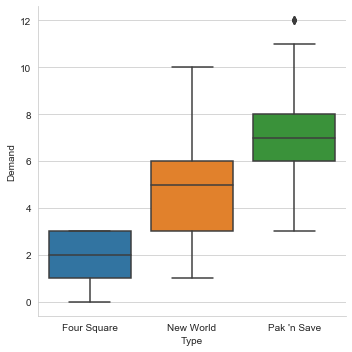

In [23]:
sns.catplot('Type','Demand',data=demandData,kind='box',legend=True)

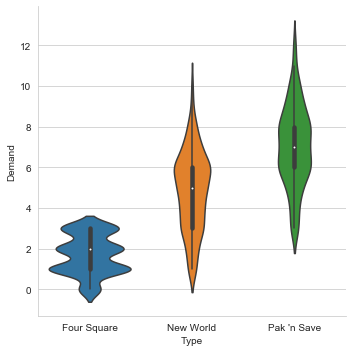

In [25]:
sns.catplot('Type','Demand',data=demandData,kind='violin',legend=True)

So we clearly have some distribution over the three different types of store. Four Square clearly has a lower variability in demand (as consumers are not as likely to shop at a four square). Next, we analyse the trends over each weekday for each respective store chain:

In [53]:
# Separating out our different supermarkets into mutually exclusive DataFrames
PAK = demandData.loc[demandData['Type'] == "Pak 'n Save"]
NW = demandData.loc[demandData['Type'] == "New World"]
FSQ = demandData.loc[demandData['Type'] == "Four Square"]

In [36]:
# Checking if operation occurred correctly
PAK.head()

,Supermarket,Type,Demand,Weekday
31,Pak 'n Save Albany,Pak 'n Save,6,Monday
32,Pak 'n Save Botany,Pak 'n Save,10,Monday
33,Pak 'n Save Clendon,Pak 'n Save,8,Monday
34,Pak 'n Save Glen Innes,Pak 'n Save,6,Monday
35,Pak 'n Save Henderson,Pak 'n Save,6,Monday


Text(0.5, 0.98, "Plot of Pak 'n Save Demand by Weekday")

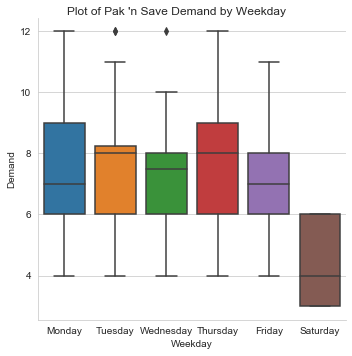

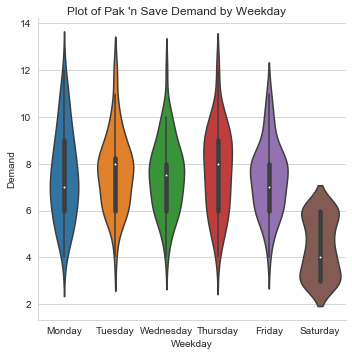

In [48]:
# Plotting Pak 'n Save trends
g = sns.catplot('Weekday','Demand',data=PAK,kind='box')
plt.subplots_adjust(top=0.95)
plt.suptitle("Plot of Pak 'n Save Demand by Weekday")
sns.catplot('Weekday','Demand',data=PAK,kind='violin')
plt.subplots_adjust(top=0.95)
plt.suptitle("Plot of Pak 'n Save Demand by Weekday")

Text(0.5, 0.98, 'Plot of New World Demand by Weekday')

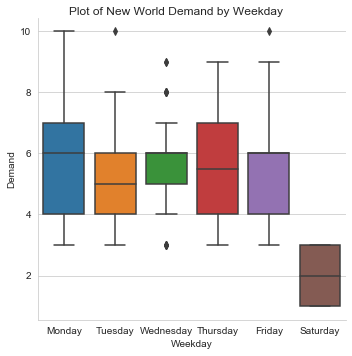

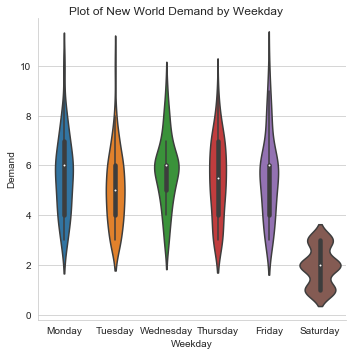

In [50]:
# Plotting New World trends
g = sns.catplot('Weekday','Demand',data=NW,kind='box')
plt.subplots_adjust(top=0.95)
plt.suptitle("Plot of New World Demand by Weekday")
sns.catplot('Weekday','Demand',data=NW,kind='violin')
plt.subplots_adjust(top=0.95)
plt.suptitle("Plot of New World Demand by Weekday")

Text(0.5, 0.98, 'Plot of Four Square Demand by Weekday')

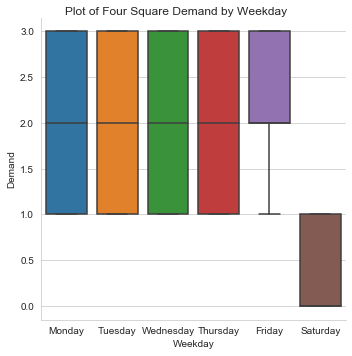

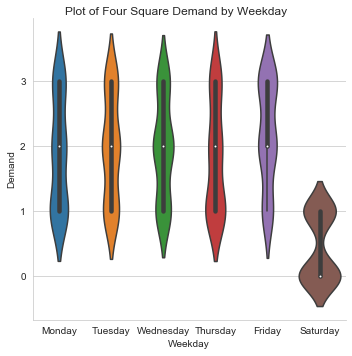

In [54]:
# Plotting Four Square trends
sns.catplot('Weekday','Demand',data=FSQ,kind='box')
plt.subplots_adjust(top=0.95)
plt.suptitle("Plot of Four Square Demand by Weekday")
sns.catplot('Weekday','Demand',data=FSQ,kind='violin')
plt.subplots_adjust(top=0.95)
plt.suptitle("Plot of Four Square Demand by Weekday")

Clearly Four Square has significantly less pallet demand than New World, and New World appears to have slightly less than Pak 'n Save, on average. Sunday has been excluded as all of the demands for all stores are zero. Saturday appears to be significantly less, so it is likely we will create 3 levels: Weekday, Saturday, and Sunday.

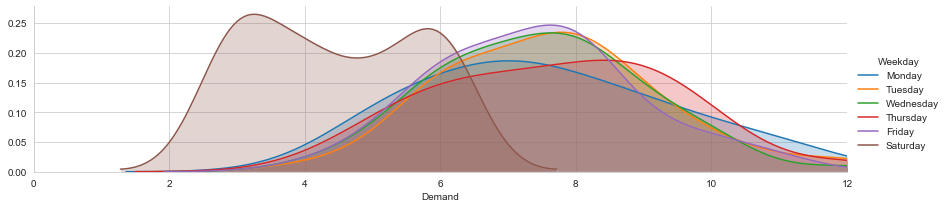

In [56]:
# Checking for any interesting fluctuations in the data for each Store Chain
figure = sns.FacetGrid(PAK,hue='Weekday',aspect=4)
figure.map(sns.kdeplot,'Demand',shade=True)

figure.set(xlim=[0,PAK['Demand'].max()])
figure.add_legend()

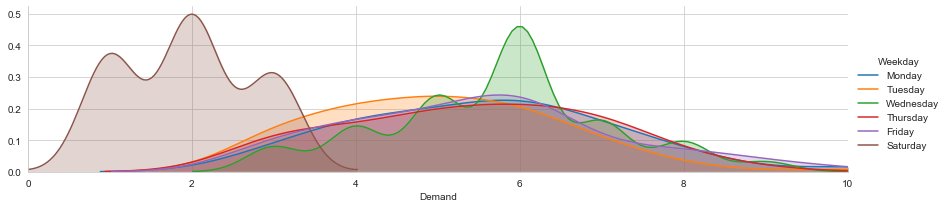

In [57]:
# Checking for any interesting fluctuations in the data for each Store Chain
figure = sns.FacetGrid(NW,hue='Weekday',aspect=4)
figure.map(sns.kdeplot,'Demand',shade=True)

figure.set(xlim=[0,NW['Demand'].max()])
figure.add_legend()

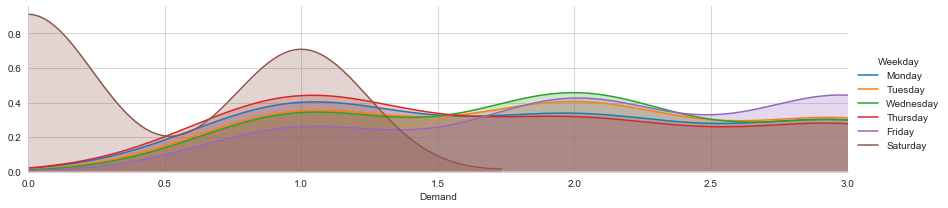

In [61]:
# Checking for any interesting fluctuations in the data for each Store Chain
figure = sns.FacetGrid(FSQ,hue='Weekday',aspect=4)
figure.map(sns.kdeplot,'Demand',shade=True)

figure.set(xlim=[0,FSQ['Demand'].max()])
figure.add_legend()

Next up is a comparision of the distribution between store types - probably a more useful plot to gauge if there are any extra constraints we need to factor in.

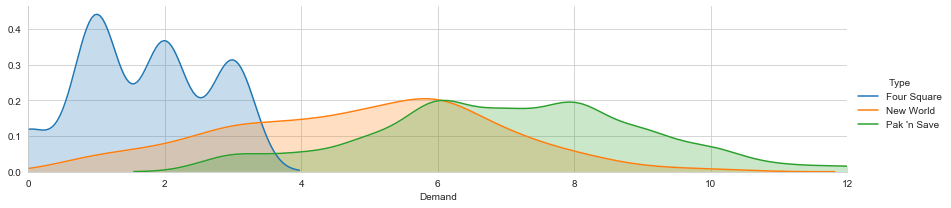

In [60]:
# Checking for any interesting differences between store types
figure = sns.FacetGrid(demandData,hue='Type',aspect=4)
figure.map(sns.kdeplot,'Demand',shade=True)

figure.set(xlim=[0,demandData['Demand'].max()])
figure.add_legend()

So nothing too dissimilar from the boxplot and violinplot we had before.

In [89]:
# Getting means for each store
pk_mean = PAK.groupby('Weekday').mean()
nw_mean = NW.groupby('Weekday').mean()
fsq_mean = FSQ.groupby('Weekday').mean()
pk_mean.head()

,Demand
Weekday,
Friday,7.400000
Monday,7.550000
Saturday,4.450000
Thursday,7.716667
Tuesday,7.666667


So we now have our averages for each day, and can easily calculate the weeky mean from this. We will use np.ceil() to calculate the means in terms of an integer amount by taking the next highest integer above the mean. 

In [114]:
# Finding mean for weekdays
mean = (sum(pk_mean['Demand'][0:2]) + sum(pk_mean['Demand'][3:7]))/5
print("The mean is {} for weekdays in PAK and the average for Saturday is {}.".format(np.ceil(mean),np.ceil(pk_mean['Demand']['Saturday'])))

mean = (sum(nw_mean['Demand'][0:2]) + sum(nw_mean['Demand'][3:7]))/5
print("The mean is {} for weekdays in NW and the average for Saturday is {}.".format(np.ceil(mean),np.ceil(nw_mean['Demand']['Saturday'])))

mean = (sum(fsq_mean['Demand'][0:2]) + sum(fsq_mean['Demand'][3:7]))/5
print("The mean is {} for weekdays in FSQ and the average for Saturday is {}.".format(np.ceil(mean),np.ceil(fsq_mean['Demand']['Saturday'])))

The mean is 8.0 for weekdays in PAK and the average for Saturday is 5.0.
The mean is 6.0 for weekdays in NW and the average for Saturday is 2.0.
The mean is 2.0 for weekdays in FSQ and the average for Saturday is 1.0.


Now we have averages and an idea of generally what we could expect to ship to each store; now we should visualise the store locations themselves. This is done using folium and will show store locations (route generation after we manage to do that???).

In [116]:
locations = pd.read_csv('FoodstuffLocations.csv')
locations.head()

,Type,Supermarket,Long,Lat
0,Warehouse,Warehouse,174.728105,-36.907904
1,New World,New World Albany,174.710513,-36.728144
2,New World,New World Birkenhead,174.711486,-36.811428
3,New World,New World Botany,174.911491,-36.933883
4,New World,New World Browns Bay,174.747287,-36.715961


In [126]:
# Now reading in data to visualise in Folium
location = locations[['Lat', 'Long']]
locationlist = location.values.tolist()

# Mapping
map = fm.Map(location=[-36.8485, 174.7633], zoom_start=10.2)
for point in range(0, len(locationlist)):
    fm.Marker(locationlist[point], popup=locations['Type'][point]).add_to(map)
map

In [162]:
# Changing Fresh Collective to Four Square
locations.loc[locations["Supermarket"] == "Fresh Collective Alberton", "Type"] = "Four Square"

# Assigning colour
def marketcolors(counter):
    if counter['Type'] == "Pak 'n Save":
        return 'black'
    elif counter['Type'] == 'New World':
        return 'blue'
    elif counter['Type'] == 'Four Square':
        return 'green'
    else:
        return 'darkblue'
locations["Colour"] = locations.apply(marketcolors, axis=1)
locations.head()

,Type,Supermarket,Long,Lat,color,Color,Colour
0,Warehouse,Warehouse,174.728105,-36.907904,darkblue,darkblue,darkblue
1,New World,New World Albany,174.710513,-36.728144,blue,blue,blue
2,New World,New World Birkenhead,174.711486,-36.811428,blue,blue,blue
3,New World,New World Botany,174.911491,-36.933883,blue,blue,blue
4,New World,New World Browns Bay,174.747287,-36.715961,blue,blue,blue


In [163]:
# Now plotting by colour
map = fm.Map(location=[-36.8485, 174.7633], zoom_start=10.2, title='Supermarkets in Auckland')

for point in range(0, len(locationlist)):
    fm.Marker(locationlist[point], popup=locations['Type'][point],icon=fm.Icon(color=locations['Colour'][point], prefix='fa')).add_to(map)
map

That is the analysis for now. Any things which I've missed out I can add in, plus I guess once we do route generations they can also be plotted in here for ease of use.